In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

#iris Data
iris_data = load_iris()
x_train,x_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

#DecisionTree Classifier 학습
dt_clf.fit(x_train,y_train)
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

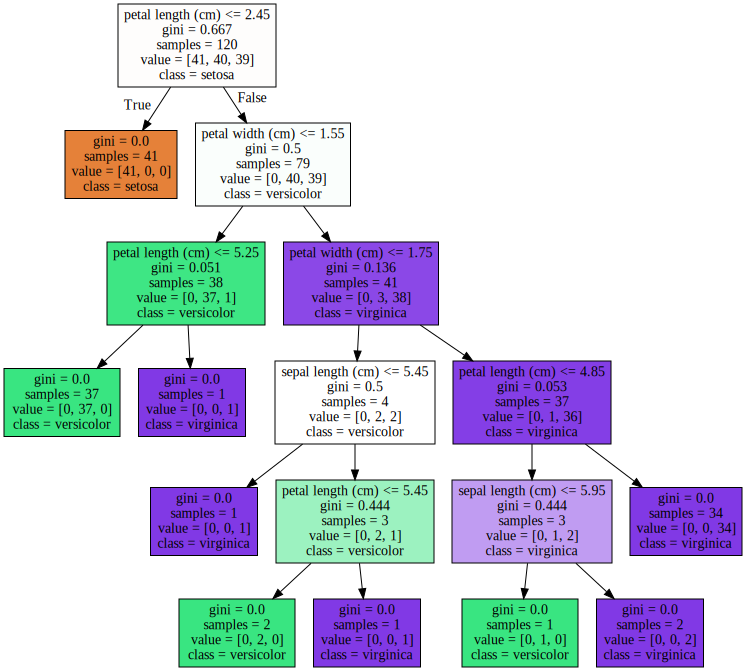

In [3]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file="tree.dot",class_names=iris_data.target_names,
               feature_names = iris_data.feature_names, impurity=True, filled=True)

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=156,
            splitter='best')
[0.02500521 0.         0.55490281 0.42009198]


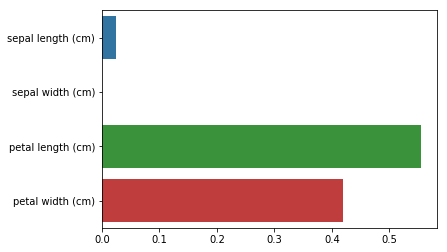

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance추출
print(dt_clf)
print(dt_clf.feature_importances_)

# feature importance 시각회
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

In [5]:
# DecisionTree 실습

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('C:/Users/kis91/Desktop/python study/data/human_activity/features.txt',sep='\s+',
                              header = None , names=['column_index','column_name'])
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('feature name 10개만 추출 :\n',feature_name[:10])

x_train = pd.read_csv('C:/Users/kis91/Desktop/python study/data/human_activity/train/X_train.txt',sep='\s+', names=feature_name)
x_test = pd.read_csv('C:/Users/kis91/Desktop/python study/data/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
y_train = pd.read_csv('C:/Users/kis91/Desktop/python study/data/human_activity/train/y_train.txt',sep='\s+', names=['action'])
y_test = pd.read_csv('C:/Users/kis91/Desktop/python study/data/human_activity/test/y_test.txt',sep='\s+', names=['action'])

feature name 10개만 추출 :
 ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


C:\Users\kis91\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)
C:\Users\kis91\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
print(x_train.info())
print(y_train['action'].value_counts())

dt_clf = DecisionTreeClassifier(random_state=156)

cv = KFold(n_splits=5,shuffle=True,random_state=1234)

params = {'max_depth' : [8],
         'min_samples_split':[16,24]}


grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=cv, verbose=1,refit=True)
grid_cv.fit(x_train,y_train)
print(pd.DataFrame(grid_cv.cv_results_)[['mean_test_score']])
print(grid_cv.best_params_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   43.8s finished


   mean_test_score
0         0.938248
1         0.935800
{'max_depth': 8, 'min_samples_split': 16}


In [22]:
best_clf = grid_cv.best_estimator_
pred = best_clf.predict(x_test)
accuracy = accuracy_score(y_test,pred)
confusion = confusion_matrix(y_test,pred)
print('accuracy :',accuracy)
print('confusion matric :\n',confusion)
y_test['action'].value_counts()

accuracy : 0.8717339667458432
confusion matric :
 [[471   9  16   0   0   0]
 [ 75 365  31   0   0   0]
 [ 13  57 350   0   0   0]
 [  0   0   0 371 120   0]
 [  0   0   0  57 475   0]
 [  0   0   0   0   0 537]]


6    537
5    532
1    496
4    491
2    471
3    420
Name: action, dtype: int64